用 PyTorch 训练一个神经网络来拟合各种函数

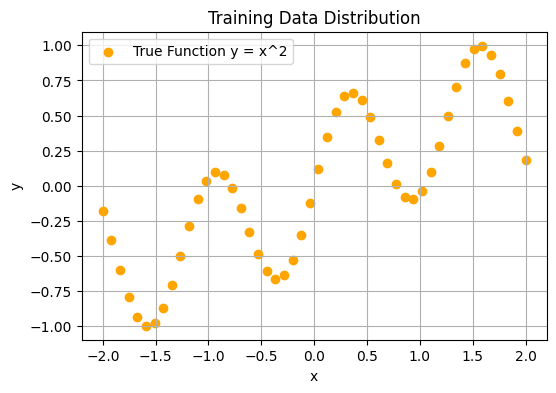

In [ ]:
# -*- coding: utf-8 -*-
# Notebook 风格：PyTorch 拟合 各种函数
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from IPython.display import clear_output

# =============================
# 1. 配置参数
# =============================
n_points = 50         # 训练点数量
hidden_size = 32       # 隐藏层神经元数
lr = 0.01              # 学习率
epochs = 1000          # 训练轮数
plot_every = 10       # 每多少轮可视化一次

# =============================
# 2. 生成训练数据
# =============================

# 定义输入 x , 按需取消注释设置 y 为你想要测试的函数
x = torch.linspace(-2, 2, n_points).unsqueeze(1)

# 线性函数
# y = 2*x + 1

# 非线性函数
# y = x**2                     # 简单二次函数
# y = x**3 + 0.3*x + 2           # 多项式函数
# y = torch.sin(x) + torch.cos(2*x)   # 三角函数

# 分段 / 不连续函数
# y = torch.abs(x)             # 绝对值函数
# y = (x > 0).float()          # 阶跃函数

# 周期性 / 振荡函数
y = torch.sin(3*x) * torch.cos(2*x)


plt.figure(figsize=(6, 4))
plt.scatter(
    x.numpy(),
    y.numpy() if type(y) is torch.Tensor else y,
    label="True Function y = x^2",
    color="orange",
)
plt.title("Training Data Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


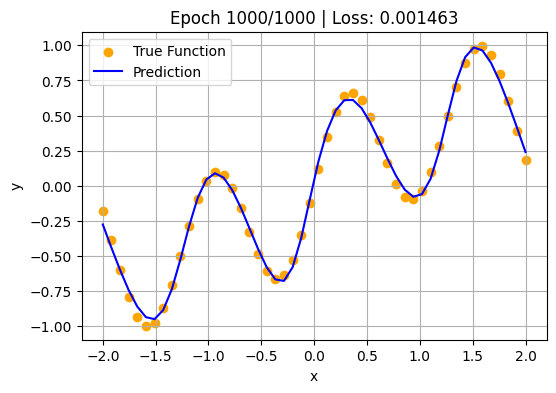

In [17]:
# =============================
# 3. 定义神经网络
# =============================
class SquareNet(nn.Module):
    def __init__(self, hidden_size=16):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, hidden_size),  # 输入层 → 隐藏层
            nn.Tanh(),                  # 激活函数提供非线性
            nn.Linear(hidden_size, 1)   # 隐藏层 → 输出层
        )
    
    def forward(self, x):
        return self.net(x)

model = SquareNet(hidden_size)

# =============================
# 4. 定义优化器和损失函数
# =============================
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

# =============================
# 5. 训练网络（Notebook 可视化）
# =============================
for epoch in range(1, epochs+1):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 每 plot_every 轮可视化
    if epoch % plot_every == 0 or epoch == 1:
        clear_output(wait=True)
        plt.figure(figsize=(6, 4))
        plt.scatter(
            x.numpy(),
            y.numpy() if type(y) is torch.Tensor else y,
            label="True Function",
            color="orange",
        )
        plt.plot(x.numpy(), y_pred.detach().numpy(), label="Prediction", color="blue")
        plt.title(f"Epoch {epoch}/{epochs} | Loss: {loss.item():.6f}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.grid(True)
        plt.show()


In [ ]:
# =============================
# 6. 最终结果可视化
# =============================
plt.figure(figsize=(6,4))
plt.scatter(x.numpy(), y.numpy(), label='True Function y = x^2', color='orange')
plt.plot(x.numpy(), model(x).detach().numpy(), label='Prediction', color='blue')
plt.title("Final Fit Result")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
